# Machine Learning

In [4]:
# ==============================================================================
# 1. IMPORTACIÓN DE BIBLIOTECAS Y CARGA DE DATOS
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # Para balanceo de datos
from datetime import datetime
import random

In [5]:
# Configuración para mostrar todas las columnas y filas (opcional, útil para exploración)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) # Descomentar si quieres ver todas las filas

print("--- 1. Cargando Datos ---")
# Carga de datos. Usaremos el dataset "Titanic".
# Asegúrate de tener 'titanic.csv' en la misma carpeta o ajusta la ruta.
try:
    df = pd.read_csv("titanic.csv")
    print("Dataset 'titanic.csv' cargado correctamente.")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'titanic.csv'.")
    print("Por favor, descarga el archivo 'train.csv' de Kaggle (https://www.kaggle.com/competitions/titanic/data),")
    print("renómbralo a 'titanic.csv' y colócalo en el mismo directorio que este notebook.")
    df = None # Para evitar errores si el archivo no se carga

--- 1. Cargando Datos ---
Dataset 'titanic.csv' cargado correctamente.


In [10]:
if df is not None:
    print("\nPrimeras 5 filas del dataset:")
    print(df.head())
    print("\nInformación general del dataset:")
    df.info()
    print("\nEstadísticas descriptivas (numéricas):")
    print(df.describe())
    print("\nEstadísticas descriptivas (categóricas):")
    print(df.describe(include=['object', 'category']))


Primeras 5 filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [11]:
# ==============================================================================
# 2. LIMPIEZA DE DATOS
# ==============================================================================
if df is not None:
    print("\n--- 2. Limpieza de Datos ---")

    # 2.1 Missing Values (Valores Faltantes)
    print("\n2.1 Manejo de Missing Values:")
    print("Valores nulos ANTES de la limpieza:")
    print(df.isnull().sum())

    # Imputación para 'Age': Usaremos la mediana porque 'Age' puede tener outliers.
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Imputación para 'Embarked': Usaremos la moda (el valor más frecuente).
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Eliminar 'Cabin': Tiene demasiados valores faltantes y es compleja de imputar bien para este ejemplo.
    # En un proyecto real, podrías intentar extraer información (ej. la letra de la cabina).
    if 'Cabin' in df.columns:
        df.drop(columns=['Cabin'], inplace=True)
        print("'Cabin' column dropped due to many missing values.")

    print("\nValores nulos DESPUÉS de la imputación/eliminación:")
    print(df.isnull().sum())

    # 2.2 Duplicados
    print("\n2.2 Manejo de Duplicados:")
    print(f"Número de filas duplicadas ANTES: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print(f"Número de filas duplicadas DESPUÉS: {df.duplicated().sum()}")

    # 2.3 Inconsistencias y No Normalizado (Ejemplo)
    # No hay ejemplos obvios de inconsistencias graves en Titanic, pero simularemos
    # la corrección de un formato de texto si lo hubiera.
    # Para 'Sex', los valores ya son consistentes ('male', 'female').
    # Ejemplo: Si tuviéramos una columna 'Ciudad' con "N.Y." y "New York"
    # df['Ciudad'] = df['Ciudad'].replace({'N.Y.': 'New York'})

    # Ejemplo de normalización de fechas (simulado, ya que Titanic no tiene una columna de fecha clara)
    # Creamos una columna de fecha simulada para demostrar
    num_rows = len(df)
    fechas_simuladas = []
    for i in range(num_rows):
        year = random.randint(1900, 1912)
        month = random.randint(1, 12)
        day = random.randint(1, 28) # Simple para evitar errores de días en meses
        if i % 3 == 0:
            fechas_simuladas.append(f"{day}/{month}/{year}")
        elif i % 3 == 1:
            fechas_simuladas.append(f"{month}-{day}-{year}")
        else:
            fechas_simuladas.append(None) # Introducir algunos NaNs

    df['Simulated_Date'] = fechas_simuladas
    # Intentar convertir a datetime, los formatos inválidos se convertirán a NaT
    df['Simulated_Date_Parsed'] = pd.to_datetime(df['Simulated_Date'], errors='coerce')
    print("\nFechas simuladas y parseadas (ejemplo de normalización de formato):")
    print(df[['Simulated_Date', 'Simulated_Date_Parsed']].head())
    # Para limpieza, podríamos decidir qué hacer con los NaT o usar un formato específico
    df.drop(columns=['Simulated_Date', 'Simulated_Date_Parsed'], inplace=True) # Quitamos la columna demo


--- 2. Limpieza de Datos ---

2.1 Manejo de Missing Values:
Valores nulos ANTES de la limpieza:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
'Cabin' column dropped due to many missing values.

Valores nulos DESPUÉS de la imputación/eliminación:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

2.2 Manejo de Duplicados:
Número de filas duplicadas ANTES: 0
Número de filas duplicadas DESPUÉS: 0

Fechas simuladas y parseadas (ejemplo de normalización de formato):
  Simulated_Date Simulated_Date_Parsed
0      2/10/1910            1910-02-10
1      6-11-1905                   NaT
2           None                   NaT
3       7/3/1909            1909

C:\Users\campe\AppData\Local\Temp\ipykernel_18748\548068978.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\campe\AppData\Local\Temp\ipykernel_18748\548068978.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e


--- 3. Técnicas Específicas en la Limpieza ---

3.1 Detección y Manejo de valores atipicos:


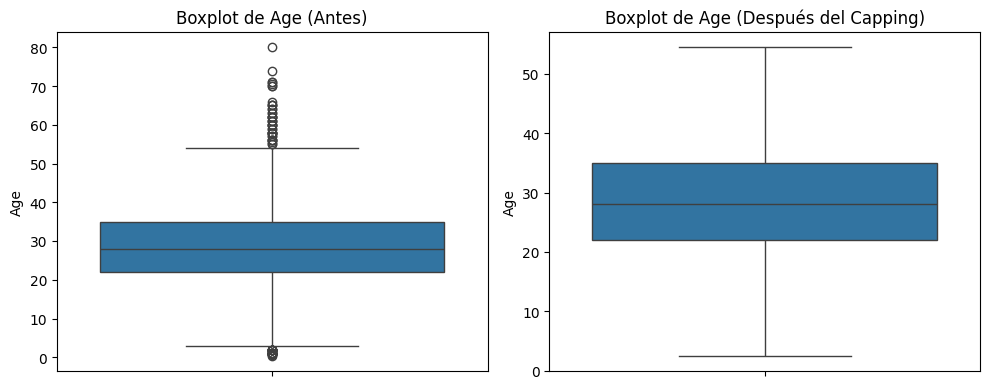

valores atipicos en 'Age' tratados con capping.


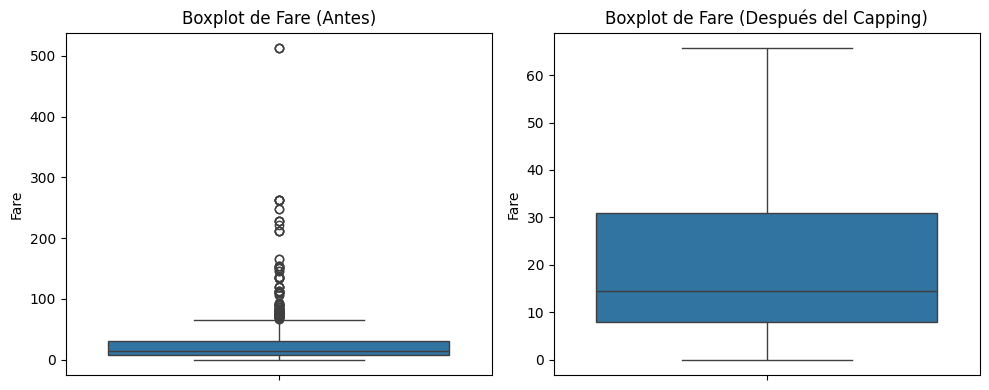

valores atipicos en 'Fare' tratados con capping.

3.2 Normalización y Estandarización:
Primeras filas con 'Age' y 'Fare' normalizadas y estandarizadas:
    Age  Age_normalized  Age_standardized     Fare  Fare_normalized  \
0  22.0        0.375000         -0.583432   7.2500         0.110460   
1  38.0        0.682692          0.742685  65.6344         1.000000   
2  26.0        0.451923         -0.251903   7.9250         0.120745   
3  35.0        0.625000          0.494038  53.1000         0.809027   
4  35.0        0.625000          0.494038   8.0500         0.122649   

   Fare_standardized  
0          -0.820552  
1           2.031623  
2          -0.787578  
3           1.419297  
4          -0.781471  

3.3 Limpieza de Texto:
Nombres originales vs. limpios (ejemplo):
                                                Name  \
0                            Braund, Mr. Owen Harris   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2                             Heikkinen, Miss. La

In [12]:
# ==============================================================================
# 3. TÉCNICAS ESPECÍFICAS EN LA LIMPIEZA
# ==============================================================================
if df is not None:
    print("\n--- 3. Técnicas Específicas en la Limpieza ---")

    # 3.1 Detección y Manejo de valores atipicos (para 'Fare' y 'Age')
    print("\n3.1 Detección y Manejo de valores atipicos:")
    numerical_cols_for_outliers = ['Age', 'Fare']
    for col in numerical_cols_for_outliers:
        if col in df.columns:
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot de {col} (Antes)')

            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Capping: Reemplazar valores atipicos con los límites
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

            plt.subplot(1, 2, 2)
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot de {col} (Después del Capping)')
            plt.tight_layout()
            plt.show()
            print(f"valores atipicos en '{col}' tratados con capping.")

    # 3.2 Normalización y Estandarización de Datos
    print("\n3.2 Normalización y Estandarización:")
    # Aplicaremos a 'Age' y 'Fare'
    if 'Age' in df.columns and 'Fare' in df.columns:
        # Normalización (MinMax Scaling)
        min_max_scaler = MinMaxScaler()
        df['Age_normalized'] = min_max_scaler.fit_transform(df[['Age']])
        df['Fare_normalized'] = min_max_scaler.fit_transform(df[['Fare']])

        # Estandarización (Standard Scaling)
        standard_scaler = StandardScaler()
        df['Age_standardized'] = standard_scaler.fit_transform(df[['Age']])
        df['Fare_standardized'] = standard_scaler.fit_transform(df[['Fare']])

        print("Primeras filas con 'Age' y 'Fare' normalizadas y estandarizadas:")
        print(df[['Age', 'Age_normalized', 'Age_standardized', 'Fare', 'Fare_normalized', 'Fare_standardized']].head())
    else:
        print("No se pudieron normalizar/estandarizar 'Age' o 'Fare' porque no existen.")

    # 3.3 Limpieza de Texto (para 'Name')
    print("\n3.3 Limpieza de Texto:")
    if 'Name' in df.columns:
        # Ejemplo: Convertir a minúsculas y eliminar puntuación (muy básico)
        df['Name_cleaned'] = df['Name'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
        print("Nombres originales vs. limpios (ejemplo):")
        print(df[['Name', 'Name_cleaned']].head())
        # Normalmente, para 'Name', extraeríamos títulos o información más útil.
        df.drop(columns=['Name_cleaned'], inplace=True) # Eliminamos esta columna demo simplificada



--- 4. Análisis Exploratorio de Datos (EDA) ---

4.1 Análisis Univariado:


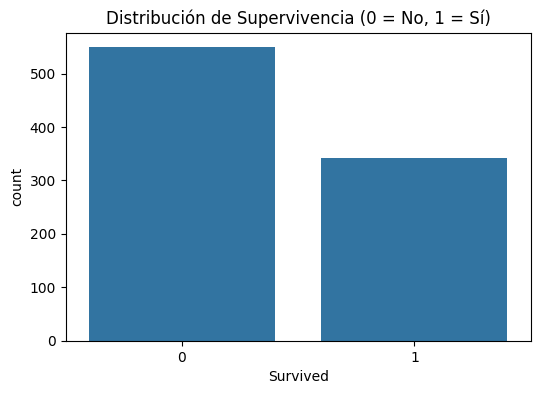

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


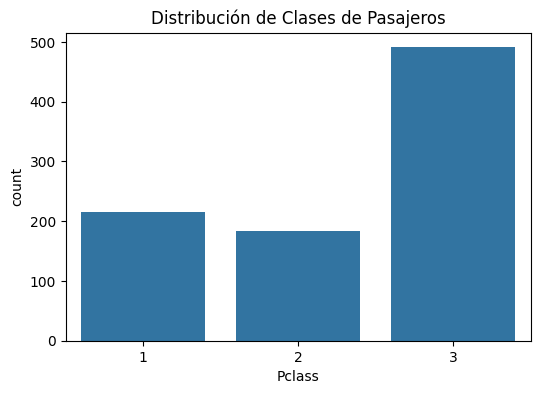

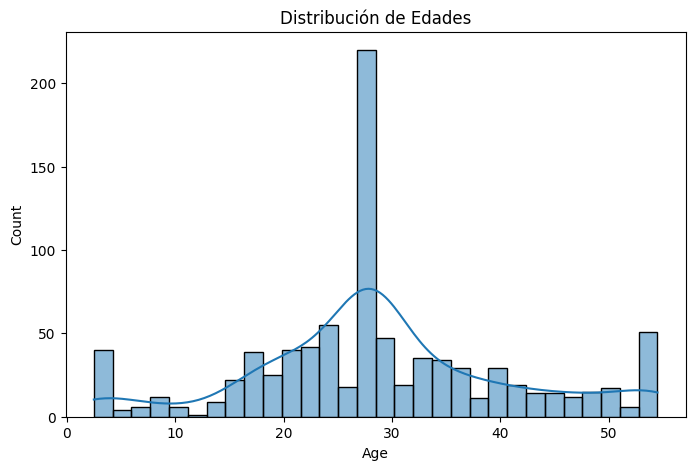


4.2 Análisis Bivariado:


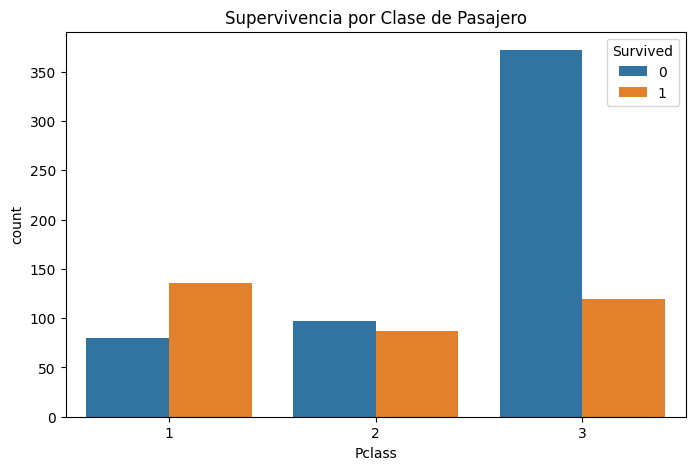

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


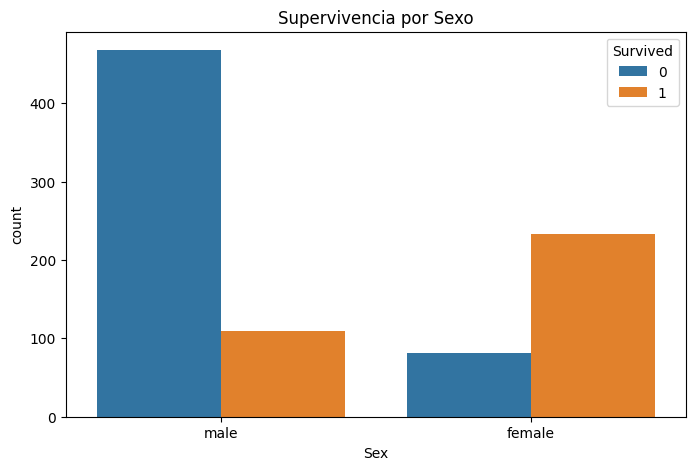

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


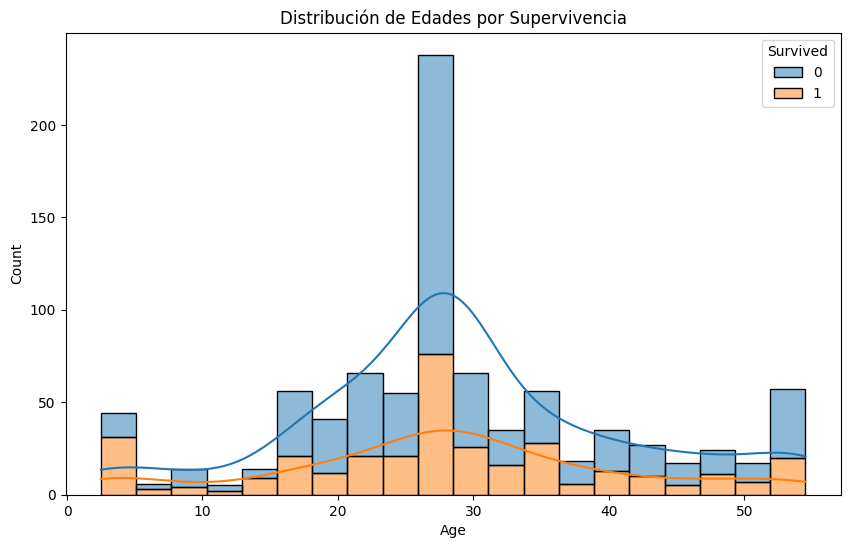

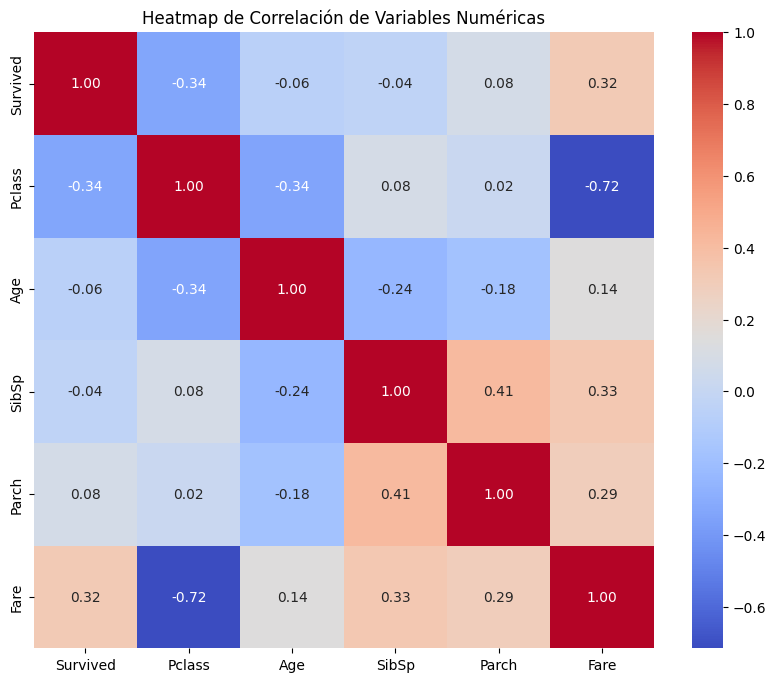

In [13]:
# ==============================================================================
# 4. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ==============================================================================
if df is not None:
    print("\n--- 4. Análisis Exploratorio de Datos (EDA) ---")

    # 4.1 Análisis Univariado
    print("\n4.1 Análisis Univariado:")

    # Variable Categórica: 'Survived'
    if 'Survived' in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x='Survived', data=df)
        plt.title('Distribución de Supervivencia (0 = No, 1 = Sí)')
        plt.show()
        print(df['Survived'].value_counts(normalize=True) * 100)

    # Variable Categórica: 'Pclass'
    if 'Pclass' in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x='Pclass', data=df)
        plt.title('Distribución de Clases de Pasajeros')
        plt.show()

    # Variable Numérica: 'Age' (usaremos la columna original antes de normalizar/estandarizar para EDA)
    if 'Age' in df.columns: # 'Age' ya fue limpiada de outliers
        plt.figure(figsize=(8,5))
        sns.histplot(df['Age'], kde=True, bins=30)
        plt.title('Distribución de Edades')
        plt.show()

    # 4.2 Análisis Bivariado
    print("\n4.2 Análisis Bivariado:")

    # Supervivencia vs. Clase ('Survived' vs 'Pclass')
    if 'Survived' in df.columns and 'Pclass' in df.columns:
        plt.figure(figsize=(8,5))
        sns.countplot(x='Pclass', hue='Survived', data=df)
        plt.title('Supervivencia por Clase de Pasajero')
        plt.show()
        print(pd.crosstab(df['Pclass'], df['Survived'], normalize='index')*100)


    # Supervivencia vs. Sexo ('Survived' vs 'Sex')
    if 'Survived' in df.columns and 'Sex' in df.columns:
        plt.figure(figsize=(8,5))
        sns.countplot(x='Sex', hue='Survived', data=df)
        plt.title('Supervivencia por Sexo')
        plt.show()
        print(pd.crosstab(df['Sex'], df['Survived'], normalize='index')*100)

    # Edad vs. Supervivencia ('Age' vs 'Survived')
    if 'Survived' in df.columns and 'Age' in df.columns:
        plt.figure(figsize=(10,6))
        sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
        plt.title('Distribución de Edades por Supervivencia')
        plt.show()

    # Correlación entre variables numéricas
    # Seleccionamos solo columnas numéricas para el heatmap de correlación
    # Excluimos PassengerId y las normalizadas/estandarizadas para claridad en este EDA inicial
    numeric_df_for_corr = df.select_dtypes(include=np.number).drop(columns=['PassengerId',
                                                                       'Age_normalized', 'Fare_normalized',
                                                                       'Age_standardized', 'Fare_standardized'],
                                                              errors='ignore')
    if not numeric_df_for_corr.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_df_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Heatmap de Correlación de Variables Numéricas')
        plt.show()



In [15]:
# ==============================================================================
# 5. PREPARACIÓN PARA MODELOS DE MACHINE LEARNING
# ==============================================================================
if df is not None and 'Survived' in df.columns: # Necesitamos 'Survived' para el ejemplo de ML
    print("\n--- 5. Preparación para Modelos de Machine Learning ---")

    # 5.1 Feature Engineering
    print("\n5.1 Feature Engineering:")
    # Crear 'FamilySize'
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Extraer Título del Nombre
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    # Agrupar títulos raros
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    print("Títulos extraídos y agrupados:")
    print(df['Title'].value_counts())

    # Seleccionar características (features) y variable objetivo (target)
    # Eliminamos columnas no útiles o ya procesadas (como Name, Ticket, PassengerId)
    # y las versiones normalizadas/estandarizadas si no las vamos a usar directamente.
    # Usaremos las columnas originales 'Age' y 'Fare' (ya tratadas por outliers)
    # y las nuevas 'FamilySize' y 'Title'.
    features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'Title']
    X = df[features]
    y = df['Survived']

    # Codificación de variables categóricas (One-Hot Encoding)
    X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
    print("\nDimensiones de X después de One-Hot Encoding:", X.shape)
    print("Primeras filas de X transformado:")
    print(X.head())

    # 5.2 División de Datos (Entrenamiento y Prueba)
    print("\n5.2 División de Datos:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Tamaño de X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Tamaño de X_test: {X_test.shape}, y_test: {y_test.shape}")
    print("Distribución de clases en y_train:")
    print(y_train.value_counts(normalize=True))
    print("Distribución de clases en y_test:")
    print(y_test.value_counts(normalize=True))


    # 5.3 Balanceo de Datos (usando SMOTE en el conjunto de entrenamiento)
    print("\n5.3 Balanceo de Datos (con SMOTE):")
    # Verificar desbalanceo
    print("Distribución de clases en y_train ANTES de SMOTE:")
    print(y_train.value_counts())

    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    print("\nDistribución de clases en y_train DESPUÉS de SMOTE:")
    print(pd.Series(y_train_balanced).value_counts())
    print(f"Tamaño de X_train_balanced: {X_train_balanced.shape}, y_train_balanced: {y_train_balanced.shape}")

    # Ahora X_train_balanced y y_train_balanced estarían listos para entrenar un modelo.
    # X_test y y_test se usarían para evaluar el modelo entrenado.

elif df is None:
    print("\nNo se pudo continuar con el procesamiento porque el dataset no fue cargado.")
elif 'Survived' not in df.columns:
    print("\nNo se pudo continuar con la preparación para ML porque la columna 'Survived' no está en el dataset.")

print("\n--- Proceso Completado ---")


--- 5. Preparación para Modelos de Machine Learning ---

5.1 Feature Engineering:
Títulos extraídos y agrupados:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

Dimensiones de X después de One-Hot Encoding: (891, 11)
Primeras filas de X transformado:
   Pclass   Age     Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S  \
0       3  22.0   7.2500           2      True       False        True   
1       1  38.0  65.6344           2     False       False       False   
2       3  26.0   7.9250           1     False       False        True   
3       1  35.0  53.1000           2     False       False        True   
4       3  35.0   8.0500           1      True       False        True   

   Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0       False      True      False       False  
1       False     False       True       False  
2        True     False      False       False  
3       False     False       True       False  
4  

<>:13: SyntaxWarning: invalid escape sequence '\.'
<>:13: SyntaxWarning: invalid escape sequence '\.'
C:\Users\campe\AppData\Local\Temp\ipykernel_18748\3956662240.py:13: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
